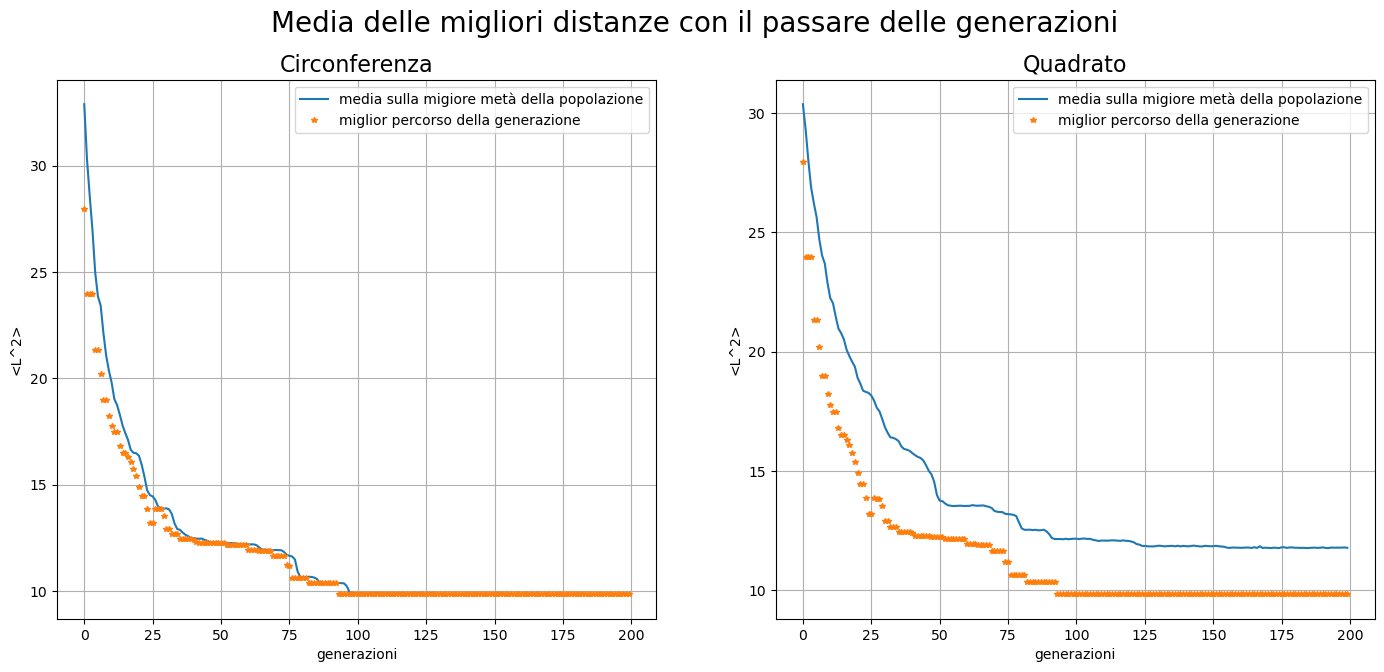

In [145]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(200)



# Carica i dati dal file
fig, (ax, axD) = plt.subplots(1, 2, figsize=(17, 7))


# Carica i dati dal file
data = np.loadtxt('cerchioL2.dat')
best=np.loadtxt('bestgencir.dat')
ax.plot(x,data, label= 'media sulla migiore metà della popolazione')
ax.plot(x,best, '*', markersize=4, label='miglior percorso della generazione')
ax.legend()
ax.set_title("Circonferenza",fontsize=16)
ax.set_xlabel('generazioni')
ax.set_ylabel('<L^2>')
ax.grid(True)


x = np.arange(200)
dataD = np.loadtxt('quadratoL2.dat')
bestD=np.loadtxt('bestgenquad.dat')
axD.plot(x,dataD, label= 'media sulla migiore metà della popolazione')
axD.plot(x,best, '*', markersize=4, label='miglior percorso della generazione')
axD.legend()
axD.set_title("Quadrato",fontsize=16)
axD.set_xlabel('generazioni')
axD.set_ylabel('<L^2>')
axD.grid(True)
plt.suptitle('Media delle migliori distanze con il passare delle generazioni', fontsize=20)
plt.show()


generazioni=200, se prosegui oltre sta stabile
N_pop=1000, pc=0.9, r=0,05

# <span style="color:green"> Laboratorio di Simulazione Numerica </span>
## <span style="color:blue">  Esercizio 9 </span>

Nella seguente esercitazione si risolve il problema del commesso viaggiatore: 
fissate le posizioni di 34 città
1. lungo una circonferenza di raggio 1
2. all'interno di un quadrato di lato 2

l'obbiettivo è trovare il più breve percorso che passi un'unica volta da ogni città e che termini nel punto di partenza. Il percorso più breve sarà quello che minimizzerà 
$$
L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|^2
$$
Trattandosi di un problema NP-hard, per risolvere il problema è necessario un algoritmo genetico. 
Per applicare quest'ultimo è innanzitutto necessario costruire una struttura dati, ogni candidata soluzione del nostro problema ('cromosoma') è rappresentato come un vettore 1D  i cui elementi, dal primo all'ultimo, sono interi che rappresentano le città nell'ordine in cui vengono visitate dal commesso;per esempio  $N=5$ città un possibile percorso è rappresentato da:

$$
\left[ 1, 3, 5, 4, 2 \right]
$$

Osservando che qualsiasi percorso possibile può essere ottenuto con una serie di permutazioni fra coppie di città creiamo la prima popolazione di cromosomi, estraendo casualmente il percorso del primo e applicandovi poi delle permutazione fra elementi casuali dell'array, così fino a costruire una popolazione di  $N=1000$ cromosomi. Creata la prima generazione, si valuta la 'bontà' di ogni suo indivduo calcolando la lunghezza del percorso a lui associato, si ordina poi la popolazione in ordine decrescente di $ L^{(2)} $, cosicchè selezionando due individui j con l'algoritmo,  $j= int(M \times r^p)+1$ con $r$ un numero uniformemente distribuito tra $r\in[0,1)$ and $p=0.1$ per il quadrato e $p=0.08$ per la circonferenza, sia più probabile selezionare gli individui con un $ L^{(2)} $ minore. Selezionati i due individui 'genitori', questi producono due 'figli' tramite il meccanismo di crossover:


esempio di madre e padre
$$
\left[ 1, 2, 3, 4, 5 \right]\\
\left[ 1, 5, 4, 3, 2 \right] 
$$
1. si tagliano nello stesso punto:
$$
\left[ 1, 2, 3 | 4, 5 \right]\\
\left[ 1, 5, 4 | 3, 2 \right] 
$$
2. si conserva la prima parte del loro cammino: 
$$
\left[ 1, 2, 3 | X, Y \right]\\
\left[ 1, 5, 4 | X, Y \right] 
$$
3. si completano i percorsi con le città macanti nell'ordine in cui appaiono nel consorte:
$$
\left[ 1, 2, 3 | 5, 4 \right]\\
\left[ 1, 5, 4 | 2, 3 \right] 
$$
Se i nuovi individui soddisfano i requisiti richiesti sopra (questo viene verificato con la funzione *check*) vi applichiamo delle mutazioni e li aggiungiamo alla nuova generazione.
L'operatore di *crossover* verrà chiamato con una probabilità del $ 90\%$ , se non viene applicao i figli sono copie identiche dei genitori.

Le possibili mutazioni applicate sono:

1. permutazioni di coppie di città (tranne la prima città)
2. shift di $+n$ posizioni per $m$ città contigue (tranne la prima città e con $m \lt N-1$).
3. permutazione di $m$ città contigue (tranne la prima) con altre $m$ città contigue ($m<N/2$).
4. inversione dell'ordine in cui appaiono $m$ città (tranne per la prima e $m \le N$).

Ogni mutazione viene chiamata con una probabilità del $ 7 \% $ .


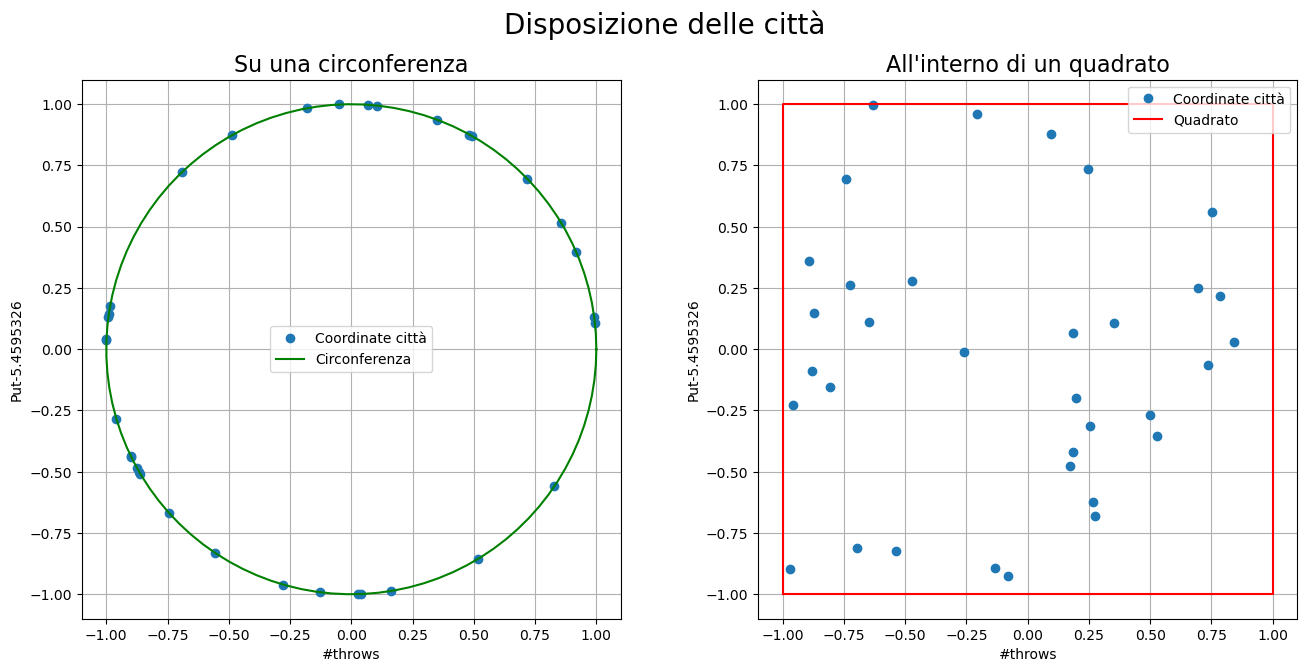

In [129]:
import matplotlib.pyplot as plt
import numpy as np

# Funzione per generare i punti di una circonferenza
def generate_circle_points(radius, num_points=100):
    theta = np.linspace(0, 2*np.pi, num_points)
    x = radius * np.cos(theta)
    y = radius * np.sin(theta)
    return x, y

# Funzione per generare i punti di un quadrato
def generate_square_points(side_length):
    x = [-side_length/2, side_length/2, side_length/2, -side_length/2, -side_length/2]
    y = [-side_length/2, -side_length/2, side_length/2, side_length/2, -side_length/2]
    return x, y

# Creazione del grafico a due subplots
fig, (ax, axD) = plt.subplots(1, 2, figsize=(16, 7))

# Caricamento e visualizzazione dei dati dal file "Disposizionecerchio.dat"
data = np.loadtxt('Disposizionecerchio.dat')
ax.plot(data[:, 0], data[:, 1], "o", label="Coordinate città")
ax.set_title("Su una circonferenza", fontsize=16)
ax.set_xlabel('#throws')
ax.set_ylabel('Put-5.4595326')
ax.set_aspect('equal') 
ax.grid(True)
ax.legend()

# Caricamento e visualizzazione dei dati dal file "Disposizionequadrato.dat"
dataD = np.loadtxt('Disposizionequadrato.dat')
axD.plot(dataD[:, 0], dataD[:, 1], "o", label="Coordinate città")
axD.set_title("All'interno di un quadrato", fontsize=16)
axD.set_xlabel('#throws')
axD.set_ylabel('Put-5.4595326')
axD.set_aspect('equal') 
axD.grid(True)
axD.legend()

# Generazione dei punti della circonferenza
circle_x, circle_y = generate_circle_points(radius=1)
ax.plot(circle_x, circle_y, "g-", label="Circonferenza")
ax.legend()

# Generazione dei punti del quadrato
square_x, square_y = generate_square_points(side_length=2)
axD.plot(square_x, square_y, "r-", label="Quadrato")
axD.legend()

# Impostazione del titolo principale e visualizzazione del grafico
plt.suptitle('Disposizione delle città ', fontsize=20)
plt.show()


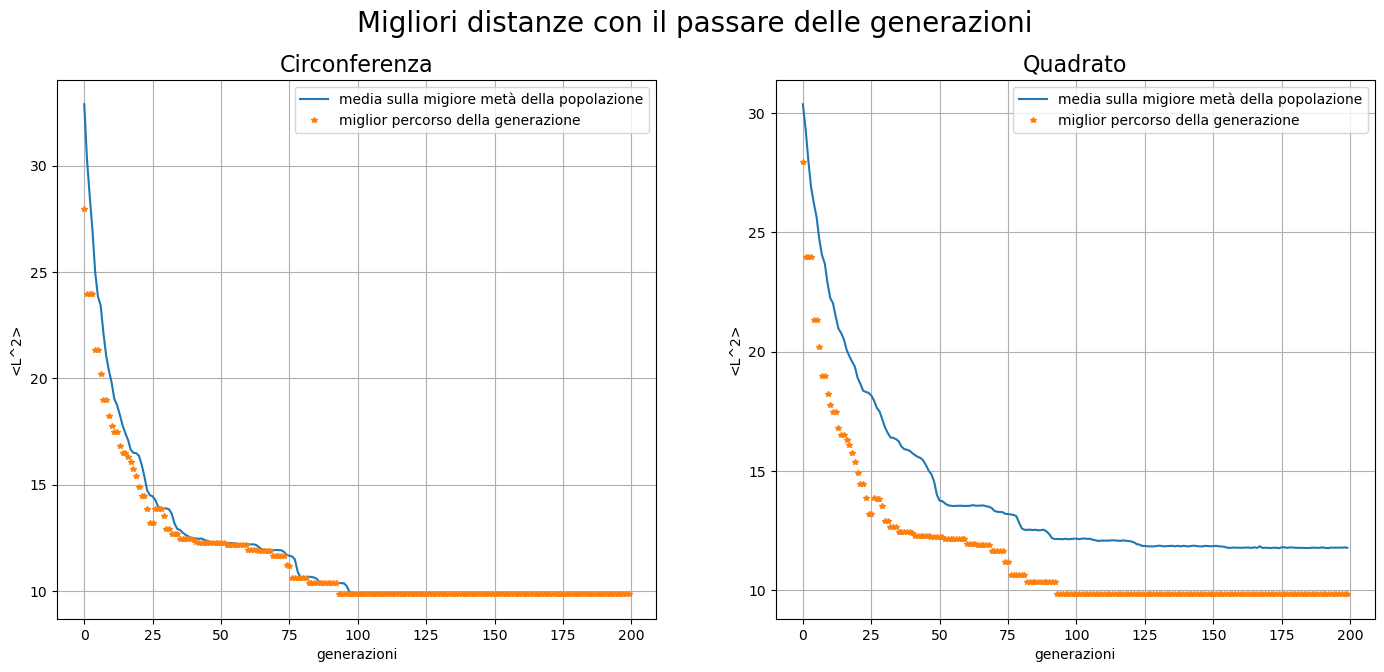

In [150]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(200)



# Carica i dati dal file
fig, (ax, axD) = plt.subplots(1, 2, figsize=(17, 7))


# Carica i dati dal file
data = np.loadtxt('cerchioL2.dat')
best=np.loadtxt('bestgencir.dat')
ax.plot(x,data, label= 'media sulla migiore metà della popolazione')
ax.plot(x,best, '*', markersize=4, label='miglior percorso della generazione')
ax.legend()
ax.set_title("Circonferenza",fontsize=16)
ax.set_xlabel('generazioni')
ax.set_ylabel('<L^2>')
ax.grid(True)


x = np.arange(200)
dataD = np.loadtxt('quadratoL2.dat')
bestD=np.loadtxt('bestgenquad.dat')
axD.plot(x,dataD, label= 'media sulla migiore metà della popolazione')
axD.plot(x,best, '*', markersize=4, label='miglior percorso della generazione')
axD.legend()
axD.set_title("Quadrato",fontsize=16)
axD.set_xlabel('generazioni')
axD.set_ylabel('<L^2>')
axD.grid(True)
plt.suptitle('Migliori distanze con il passare delle generazioni', fontsize=20)
plt.show()


Con i parametri scelti, dopo 200 generazioni l'algoritmo si stabilizza in un minimo della distanza.

Riportiamo quindi il miglior percorso trovato, ovvero il migliore all'interno dell'ultima generazione

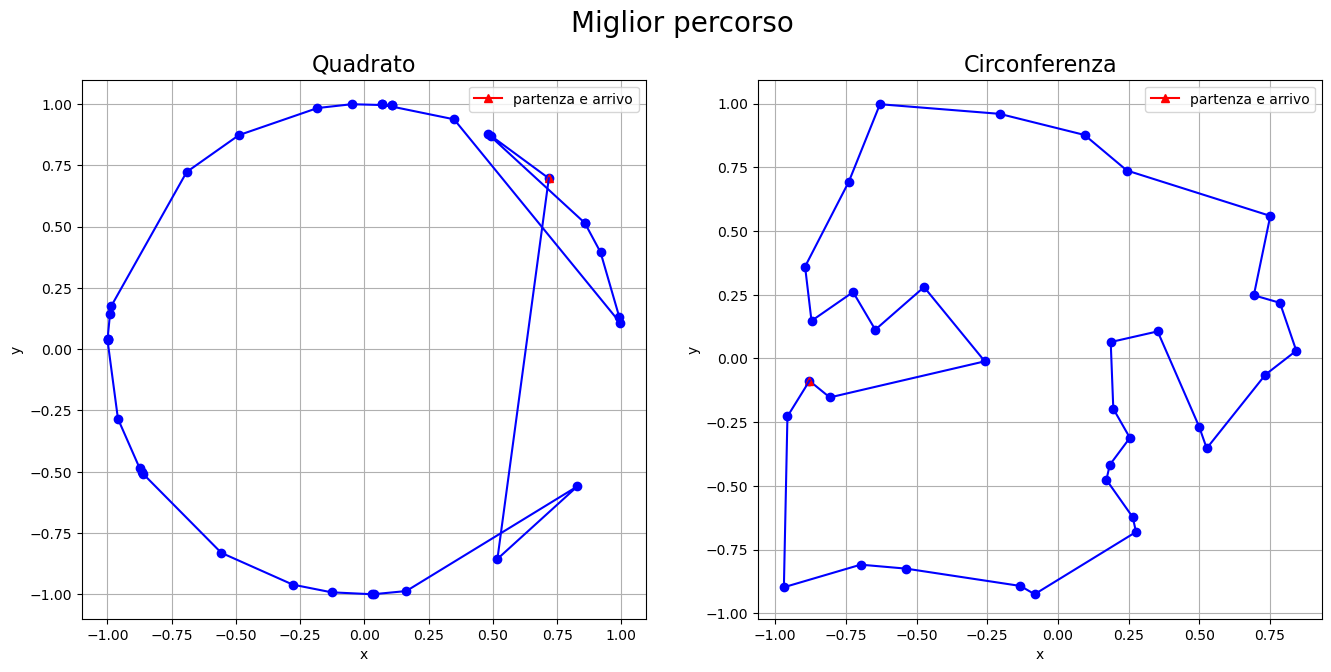

In [130]:

# Carica i dati dal file
fig, (ax, axD) = plt.subplots(1, 2, figsize=(16, 7))


# Carica i dati dal file
data = np.loadtxt('best.dat')
ax.plot(data[:,0],data[:,1], marker='o', color= 'blue')
ax.plot(data[0,0],data[0,1], marker='^',color='red' ,label='partenza e arrivo')
#ax.plot([data[-1,0], data[-1 ,1]], [data[0,0], data[0, 1]], color='red', linestyle='-')
ax.plot([data[0,0], data[-1,0]], [data[0,1], data[-1,1]], color='blue', linestyle='-')
ax.set_title("Quadrato",fontsize=16)
ax.set_xlabel('x')
ax.legend()
ax.set_ylabel('y')
ax.grid(True)



dataD = np.loadtxt('bestquad.dat')
axD.plot(dataD[:,0],dataD[:,1], marker='o', color= 'blue')
axD.plot(dataD[0,0],dataD[0,1], marker='^',color='red' ,label='partenza e arrivo')
#ax.plot([data[-1,0], data[-1 ,1]], [data[0,0], data[0, 1]], color='red', linestyle='-')
axD.plot([dataD[0,0], dataD[-1,0]], [dataD[0,1], dataD[-1,1]], color='blue', linestyle='-')
axD.set_title("Circonferenza",fontsize=16)
axD.set_xlabel('x')
axD.legend()
axD.set_ylabel('y')
axD.grid(True)
plt.suptitle('Miglior percorso', fontsize=20)

plt.show()